In [6]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
url='https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv'
df=pd.read_csv(url)
df

airline  avail_seat_km_per_week  incidents_85_99  \
0                   Aer Lingus               320906734                2   
1                    Aeroflot*              1197672318               76   
2        Aerolineas Argentinas               385803648                6   
3                  Aeromexico*               596871813                3   
4                   Air Canada              1865253802                2   
5                   Air France              3004002661               14   
6                   Air India*               869253552                2   
7             Air New Zealand*               710174817                3   
8             Alaska Airlines*               965346773                5   
9                     Alitalia               698012498                7   
10          All Nippon Airways              1841234177                3   
11                   American*              5228357340               21   
12           Austrian Airlines               358239823                1   
13                     Avianca               396922563                5   
14            British Airways*              3179760952                4   
15             Cathay Pacific*              2582459303                0   
16              China Airlines               813216487               12   
17                      Condor               417982610                2   
18                        COPA               550491507                3   
19          Delta / Northwest*              6525658894               24   
20                    Egyptair               557699891                8   
21                       El Al               335448023                1   
22          Ethiopian Airlines               488560643               25   
23                     Finnair               506464950                1   
24            Garuda Indonesia               613356665               10   
25                    Gulf Air               301379762                1   
26           Hawaiian Airlines               493877795                0   
27                      Iberia              1173203126                4   
28              Japan Airlines              1574217531                3   
29               Kenya Airways               277414794                2   
30                        KLM*              1874561773                7   
31                  Korean Air              1734522605               12   
32                LAN Airlines              1001965891                3   
33                  Lufthansa*              3426529504                6   
34           Malaysia Airlines              1039171244                3   
35      Pakistan International               348563137                8   
36         Philippine Airlines               413007158                7   
37                     Qantas*              1917428984                1   
38             Royal Air Maroc               295705339                5   
39                        SAS*               682971852                5   
40               Saudi Arabian               859673901                7   
41          Singapore Airlines              2376857805                2   
42               South African               651502442                2   
43          Southwest Airlines              3276525770                1   
44       Sri Lankan / AirLanka               325582976                2   
45                      SWISS*               792601299                2   
46                        TACA               259373346                3   
47                         TAM              1509195646                8   
48          TAP - Air Portugal               619130754                0   
49                Thai Airways              1702802250                8   
50            Turkish Airlines              1946098294                8   
51       United / Continental*              7139291291               19   
52  US Airways / America West*              2455

In [3]:
df.shape 

(56, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [7]:
# Basic cleaning and rename columns 
df=df.rename(columns={
    'airline':'Airline',
    'avail_seat_km_per_week':'askm_per_week',
    'incidents_85_99':'inc_8599',
    'fatal_accidents_85_99':'fat_acc_8599',
    'fatalities_85_99':'fat_8599',
    'incidents_00_14':'inc_0014',
    'fatal_accidents_00_14':'fat_acc_0014',
    'fatalities_00_14':'fat_0014'
})

In [8]:
# convert to numeric 
num_cols=['askm_per_week','inc_8599','fat_acc_8599','fat_8599','inc_0014','fat_acc_0014','fat_0014']
df[num_cols]=df[num_cols].apply(pd.to_numeric,errors='coerce')

In [9]:
df[num_cols]

askm_per_week  inc_8599  fat_acc_8599  fat_8599  inc_0014  fat_acc_0014  \
0       320906734         2             0         0         0             0   
1      1197672318        76            14       128         6             1   
2       385803648         6             0         0         1             0   
3       596871813         3             1        64         5             0   
4      1865253802         2             0         0         2             0   
5      3004002661        14             4        79         6             2   
6       869253552         2             1       329         4             1   
7       710174817         3             0         0         5             1   
8       965346773         5             0         0         5             1   
9       698012498         7             2        50         4             0   
10     1841234177         3             1         1         7             0   
11     5228357340        21             5       101        17             3   
12      358239823         1             0         0         1             0   
13      396922563         5             3       323         0             0   
14     3179760952         4             0         0         6             0   
15     2582459303         0             0         0         2             0   
16      813216487        12             6       535         2             1   
17      417982610         2             1        16         0             0   
18      550491507         3             1        47         0             0   
19     6525658894        24            12       407        24             2   
20      557699891         8             3       282         4             1   
21      335448023         1             1         4         1             0   
22      488560643        25             5       167         5             2   
23      506464950         1             0         0         0             0   
24      613356665        10             3       260         4             2   
25      301379762         1             0         0         3             1   
26      493877795         0             0         0         1             0   
27     1173203126         4             1       148         5             0   
28     1574217531         3             1       520         0             0   
29      277414794         2             0         0         2             2   
30     1874561773         7             1         3         1             0   
31     1734522605        12             5       425         1             0   
32     1001965891         3             2        21         0             0   
33     3426529504         6             1         2         3             0   
34     1039171244         3             1        34         3             2   
35      348563137         8             3       234        10             2   
36      413007158         7             4        74         2             1   
37     1917428984         1             0         0         5             0   
38      295705339         5             3        51         3             0   
39      682971852         5             0         0         6             1   
40      859673901         7             2       313        11             0   
41     2376857805         2             2         6         2             1   
42      651502442         2             1       159         1             0   
43     3276525770         1             0         0         8             0   
44      325582976         2             1        14         4             0   
45      792601299         2             1       229         3             0   
46      259373346         3             1         3         1             1   
47     1509195646         8             3        98         7             2   
48      619130754         0             0         0         0             0   
49     1702802250         8             4       308   

In [10]:
# feature engineering (rates & changes)
df['askm_bill_per_week']=df['askm_per_week']/1e9

In [12]:
for period in ['8599','0014']:
    df[f'rate_inc_{period}']=df[f'inc_{period}']/df['askm_bill_per_week']
    df[f'rate_fatacc_{period}']=df[f'fat_acc_{period}']/df['askm_bill_per_week']
    df[f'rate_fat_{period}']=df[f'fat_{period}']/df['askm_bill_per_week']

In [13]:
# changes (2000-14 minus 1985-99)
df['chg_rate_inc']=df['rate_inc_0014']-df['rate_inc_8599']
df['chg_rate_fatacc']=df['rate_fatacc_0014']-df['rate_fatacc_8599']
df['chg_rate_fat']=df['rate_fat_0014']-df['rate_fat_8599']

In [14]:
# binary label : had at least one fatal accident in 2000-14 
df['had_fatal_0014']=(df['fat_acc_0014']>0).astype(int)
df.head()

Airline  askm_per_week  inc_8599  fat_acc_8599  fat_8599  \
0             Aer Lingus      320906734         2             0         0   
1              Aeroflot*     1197672318        76            14       128   
2  Aerolineas Argentinas      385803648         6             0         0   
3            Aeromexico*      596871813         3             1        64   
4             Air Canada     1865253802         2             0         0   

   inc_0014  fat_acc_0014  fat_0014  askm_bill_per_week  rate_inc_8599  \
0         0             0         0            0.320907       6.232340   
1         6             1        88            1.197672      63.456422   
2         1             0         0            0.385804      15.551952   
3         5             0         0            0.596872       5.026205   
4         2             0         0            1.865254       1.072240   

   rate_fatacc_8599  rate_fat_8599  rate_inc_0014  rate_fatacc_0014  \
0          0.000000       0.000000       0.000000          0.000000   
1         11.689341     106.873974       5.009718          0.834953   
2          0.000000       0.000000       2.591992          0.000000   
3          1.675402     107.225703       8.377008          0.000000   
4          0.000000       0.000000       1.072240          0.000000   

   rate_fat_0014  chg_rate_inc  chg_rate_fatacc  chg_rate_fat  had_fatal_0014  
0       0.000000     -6.232340         0.000000      0.000000               0  
1      73.475857    -58.446704       -10.854388    -33.398117               1  
2       0.000000    -12.959960         0.000000      0.000000               0  
3       0.000000      3.350803        -1.675402   -107.225703               0  
4       0.000000      0.000000         0.000000      0.000000               0

In [17]:
# Quick EDA - Top/Bottom airlines by 2000-14 fatality rate
top10=df.sort_values('rate_fat_0014',ascending=False).head(10)
bottom10=df.sort_values('rate_fat_0014',ascending=True).head(10)

display(top10[['Airline','rate_fat_0014']])
display(bottom10[['Airline','rate_fat_0014']])

Airline  rate_fat_0014
29           Kenya Airways    1020.133050
34       Malaysia Airlines     516.757948
25                Gulf Air     474.484415
16          China Airlines     276.679093
22      Ethiopian Airlines     188.308251
6               Air India*     181.765147
39                    SAS*     161.060810
35  Pakistan International     131.970352
47                     TAM     124.569668
5               Air France     112.183656

Airline  rate_fat_0014
0          Aer Lingus            0.0
26  Hawaiian Airlines            0.0
54    Virgin Atlantic            0.0
28     Japan Airlines            0.0
30               KLM*            0.0
31         Korean Air            0.0
32       LAN Airlines            0.0
33         Lufthansa*            0.0
23            Finnair            0.0
37            Qantas*            0.0

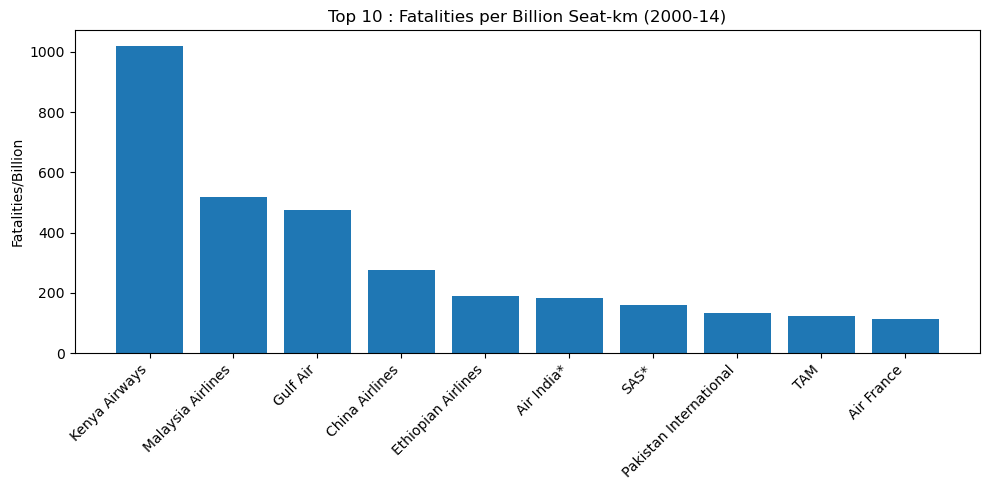

In [30]:
# bar plot for top10
plt.figure(figsize=(10,5))
plt.bar(top10['Airline'],top10['rate_fat_0014'])
plt.title('Top 10 : Fatalities per Billion Seat-km (2000-14)')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Fatalities/Billion')
plt.tight_layout()
plt.savefig('Top 10 Fatalities',dpi=300,bbox_inches='tight')
plt.show()

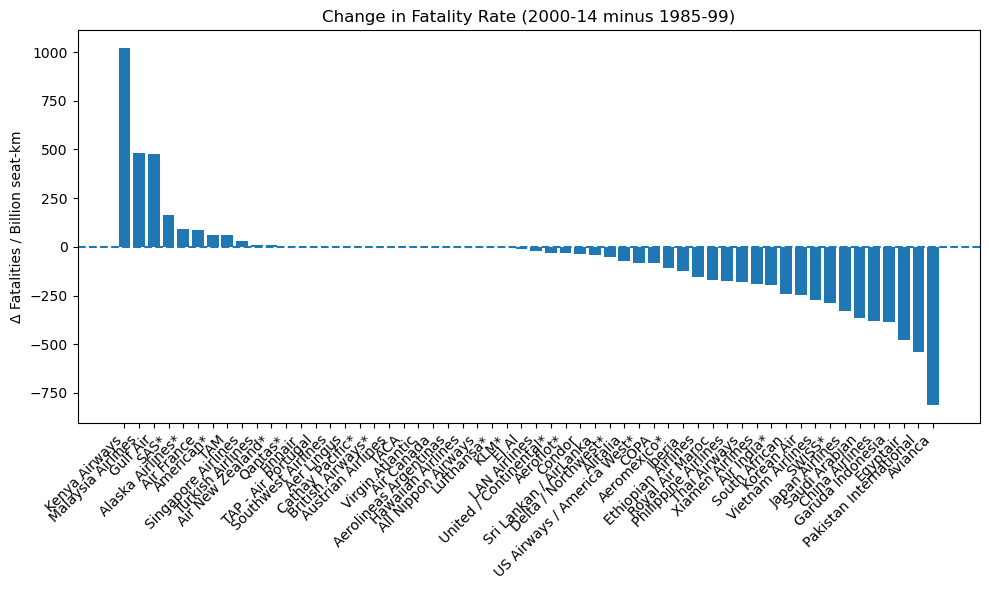

In [21]:
chg=df.sort_values('chg_rate_fat',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(chg['Airline'],chg['chg_rate_fat'])
plt.axhline(0,linestyle='--')
plt.title('Change in Fatality Rate (2000-14 minus 1985-99)')
plt.xticks(rotation=45,ha='right')
plt.ylabel("Δ Fatalities / Billion seat-km")
plt.tight_layout()
plt.savefig('Change in Fatality',dpi=300,bbox_inches='tight')
plt.show()

In [25]:
chg.head(10)[["Airline","chg_rate_fat"]], chg.tail(10)[["Airline","chg_rate_fat"]]

(               Airline  chg_rate_fat
 29       Kenya Airways   1020.133050
 34   Malaysia Airlines    484.039568
 25            Gulf Air    474.484415
 39                SAS*    161.060810
 8     Alaska Airlines*     91.158952
 5           Air France     85.885410
 11           American*     60.248369
 47                 TAM     59.634415
 41  Singapore Airlines     32.395712
 50    Turkish Airlines     10.276973,
                    Airline  chg_rate_fat
 31              Korean Air   -245.024192
 53        Vietnam Airlines   -273.562831
 45                  SWISS*   -288.922060
 28          Japan Airlines   -330.322836
 40           Saudi Arabian   -364.091546
 16          China Airlines   -381.202306
 24        Garuda Indonesia   -388.028717
 20                Egyptair   -480.545190
 35  Pakistan International   -539.357092
 13                 Avianca   -813.760744)

In [24]:
# Simple risk model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

X = df[["rate_inc_8599","rate_fatacc_8599","rate_fat_8599","askm_bill_per_week"]].copy()
y = df["had_fatal_0014"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=200, solver="liblinear", random_state=42))
])
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

print("Classification report:")
print(classification_report(y_test, pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, proba))


Classification report:
              precision    recall  f1-score   support

           0      0.625     0.500     0.556        10
           1      0.444     0.571     0.500         7

    accuracy                          0.529        17
   macro avg      0.535     0.536     0.528        17
weighted avg      0.551     0.529     0.533        17

ROC-AUC: 0.6428571428571429


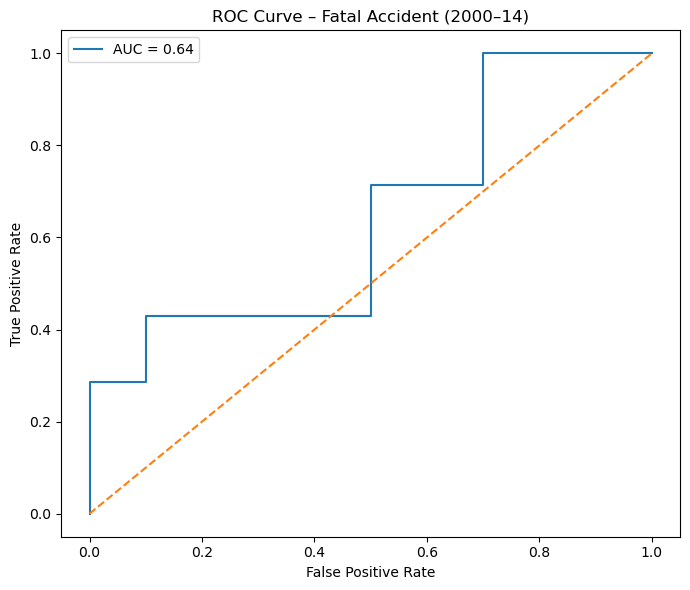

In [26]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
model_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {model_auc:.2f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Fatal Accident (2000–14)")
plt.legend()
plt.tight_layout()
plt.savefig('ROC Curve',dpi=300,bbox_inches='tight')
plt.show()

In [28]:
# Export results
out_cols = [
    "Airline","askm_bill_per_week",
    "rate_inc_8599","rate_fatacc_8599","rate_fat_8599",
    "rate_inc_0014","rate_fatacc_0014","rate_fat_0014",
    "chg_rate_inc","chg_rate_fatacc","chg_rate_fat",
    "had_fatal_0014"
]
df[out_cols].sort_values("rate_fat_0014", ascending=False).to_csv("airline_safety_results.csv", index=False)
print("Saved -> airline_safety_results.csv")

Saved -> airline_safety_results.csv
